## ***Random Walk: Empire State Building bet*** ##

Imagine the following: you're walking up the empire state building to DataCamp HeadQuarters and you're playing a game with a friend.
You throw a die one hundred times.

*    If it's 1 or 2 you'll go one step down.

*    If it's 3, 4, or 5, you'll go one step up.

*    If you throw a 6, you'll throw the die again and will walk up the resulting number of steps.

Of course, you can not go lower than step number 0. And also, you admit that you're a bit clumsy and have a chance of 0.1% of falling down the stairs when you make a move. Falling down means that you have to start again from step 0. With all of this in mind, you bet with your friend that you'll reach 60 steps high.

*The first thing we'll need are random generators, so we can simulate the die. You need to import numpy, and inside numpy, there is the random package. Inside that package we find the "rand" function.*

In [44]:
# Import libraries and set seed as 123
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

*If you use a dice to determine your next step, you can call this a random step. What if you use a dice 100 times to determine your next step? You would have a succession of random steps, or in other words, a random walk.*



In [45]:
# initialize random_walk
random_walk = [0]

for x in range(0, 100) :
    # set step: last element in random_walk
    step = random_walk[-1]

    # roll the dice
    dice = np.random.randint(1,7)

    # determine next step
    if dice <= 2:
        # use max to make sure step can't go below 0
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# print random_walk
print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


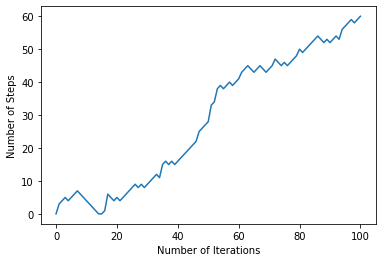

In [46]:
# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.xlabel('Number of Iterations')
plt.ylabel('Number of Steps')
plt.show()

***What are the odds that you'll reach 60 steps high on the Empire State Building?***


*To find the distribution of this walk, we start by creating an empty list named all_walks. This list will contain the number of steps you end up with if you play this game of rolling a dice 100 times over and over again. Let's write a for loop that runs 100 times. Inside this for loop, we put the code that gradually builds up the random_walk list. After simulating this single game, we append the last number, so the number of steps after rolling a dice 100 times, to the all_walks list. Each number is the number of steps that were taken in a game of 100 rolls. All these values actually represent a distribution, that we can visualize.*

Please enter number of iterations to perform: 500


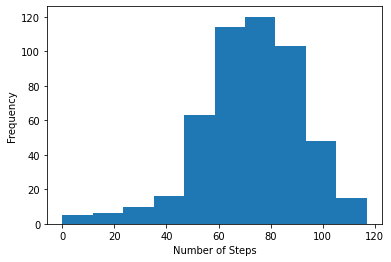

In [51]:
# Simulate random walk 1000 times
all_walks = []
iterations = int(input('Please enter number of iterations to perform: '))

for i in range(iterations) :
    random_walk = [0]

    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0
    
        random_walk.append(step)

    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.show()

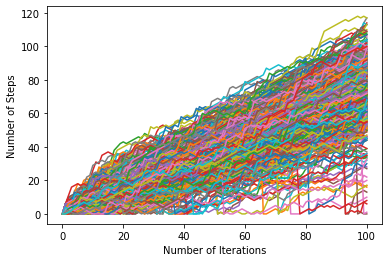

In [52]:
# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.xlabel('Number of Iterations')
plt.ylabel('Number of Steps')
plt.show()

*The histogram was created from a NumPy array ends, that contains 1000 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.*

In [50]:
high_ends = [i for i in ends if i >= 60]
print(str(len(high_ends)/iterations*100) +' % ')

79.2 % 


> ***Hence, there is 79.2 % chance that I will reach 60 steps high on the Empire State Building!***

